<a href="https://colab.research.google.com/github/chetan110801/CoffeeSalesAnalysis/blob/main/imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

# Assuming your file is named 'data.csv'
import pandas as pd
df = pd.read_csv("customer_churn.csv")
df.sample(5)

Saving customer_churn.csv to customer_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
410,0334-GDDSO,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.35,233.7,Yes
5015,0708-SJDIS,Female,0,No,No,34,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,65.00,2157.5,No
6229,6631-HMANX,Male,0,Yes,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.45,6227.5,No
5171,3566-VVORZ,Female,0,Yes,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.90,505.95,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

<ipython-input-7-4444e55674a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

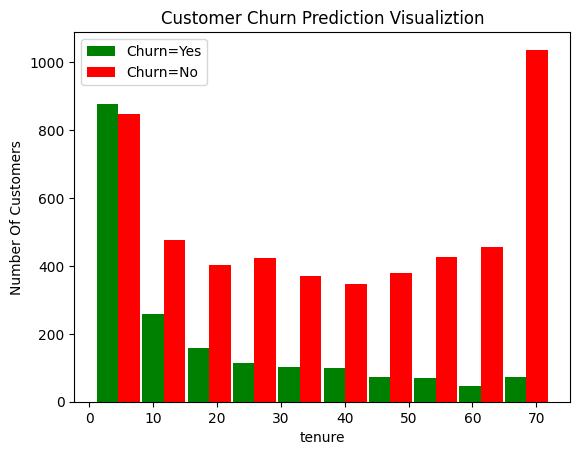

In [8]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

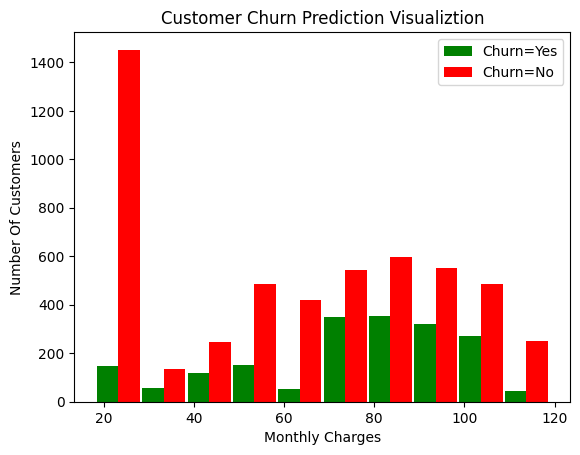

In [9]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [10]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [11]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-11-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-11-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [12]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-12-34dfac0bf179>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-12-34dfac0bf179>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-12-34dfac0bf179>:4: Set

In [13]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [14]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-14-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-14-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-14-ba15

In [15]:
df1.gender.unique()

array([1, 0])

In [16]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
# 1. Identify the boolean columns
bool_cols = df2.select_dtypes(include='bool').columns

# 2. Convert the boolean columns to integers
df2[bool_cols] = df2[bool_cols].astype(int)

In [18]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
import pandas as pd
from sklearn.utils import resample

# Separate the majority class (Churn = 0) and minority class (Churn = 1)
df_majority = df2[df2['Churn'] == 0]
df_minority = df2[df2['Churn'] == 1]

# Calculate target counts to achieve 95% majority to 5% minority ratio
desired_ratio = 0.05
target_minority_count = int(len(df_majority) * desired_ratio / (1 - desired_ratio))

# Down-sample the minority class
df_minority_downsampled = resample(df_minority,
                                   replace=False,  # sample without replacement
                                   n_samples=target_minority_count,  # target count
                                   random_state=42)  # reproducibility

# Combine the majority class with the down-sampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
class_distribution = df_balanced['Churn'].value_counts(normalize=True) * 100
class_distribution

,proportion
Churn,
0,95.012882
1,4.987118


In [21]:
X = df_balanced.drop('Churn',axis='columns')
y = testLabels = df_balanced.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15, stratify=y)

In [22]:
y_train.value_counts()

,count
Churn,
0.0,4646
1.0,244


In [23]:
y.value_counts()

,count
Churn,
0.0,5163
1.0,271


In [24]:
y_test.value_counts()

,count
Churn,
0.0,517
1.0,27


In [25]:
X_train.shape

(4890, 26)

In [26]:
X_test.shape

(544, 26)

In [27]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2196,1,0,1,0,0.971831,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
1743,1,0,0,0,0.845070,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
905,1,0,0,0,0.126761,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1335,1,0,1,1,0.661972,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2552,0,0,0,0,0.042254,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
302,0,0,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2034,0,0,0,0,0.084507,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5064,1,0,0,0,0.140845,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4887,1,0,1,0,0.971831,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0
396,0,0,0,0,0.323944,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       517
         1.0       0.38      0.11      0.17        27

    accuracy                           0.95       544
   macro avg       0.67      0.55      0.57       544
weighted avg       0.93      0.95      0.93       544

Confusion Matrix:
 [[512   5]
 [ 24   3]]
ROC AUC Score: 0.7946844329823053


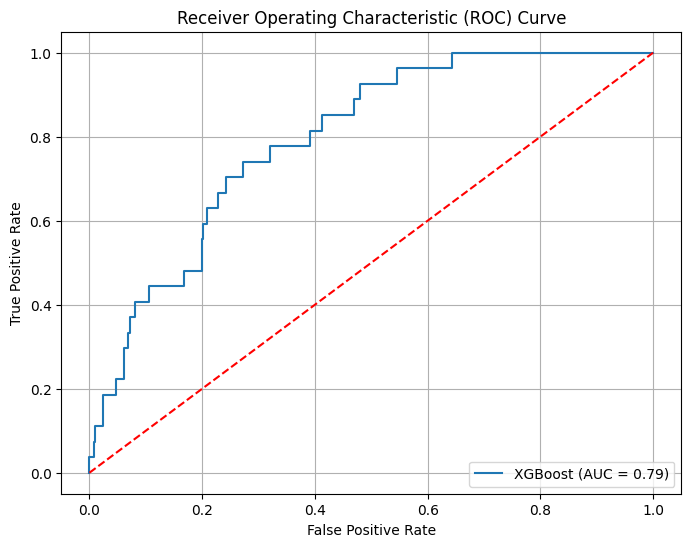

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict class labels
y_pred = xgb_model.predict(X_test)

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [29]:
# Define the model metrics to collect
model_metrics = []

# Collect metrics for the XGBoost model (from the earlier output)
xgb_report = classification_report(y_test, y_pred, output_dict=True)
xgb_metrics = {
    'Model': 'XGBoost',
    'Precision (Class 1)': xgb_report['1.0']['precision'],
    'Recall (Class 1)': xgb_report['1.0']['recall'],
    'F1-Score (Class 1)': xgb_report['1.0']['f1-score'],
    'Accuracy': xgb_report['accuracy'],
    'ROC AUC Score': roc_auc
}
model_metrics.append(xgb_metrics)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       517
         1.0       0.20      0.22      0.21        27

    accuracy                           0.92       544
   macro avg       0.58      0.59      0.58       544
weighted avg       0.92      0.92      0.92       544

Best Model Confusion Matrix:
 [[493  24]
 [ 21   6]]
Best Model ROC AUC Score: 0.831793108388853


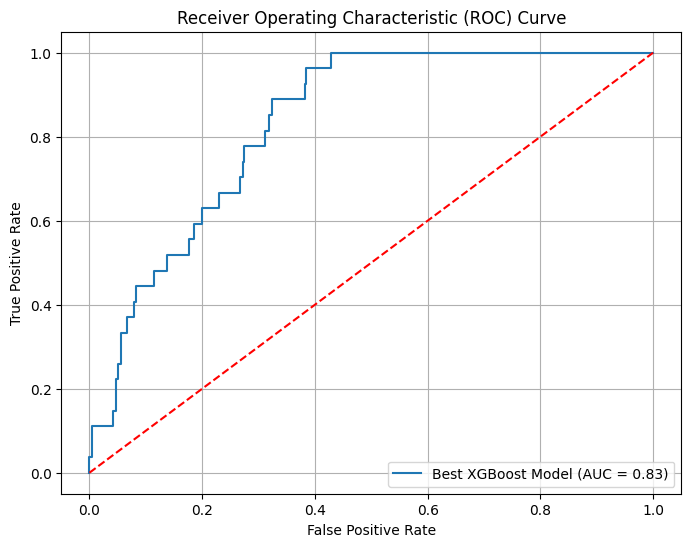

In [30]:
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV # import GridSearchCV

warnings.filterwarnings('ignore')

# Calculate initial scale_pos_weight
counter = Counter(y_train)
initial_scale_pos_weight = counter[0.0] / counter[1.0]

# Define parameter grid for scale_pos_weight
param_grid = {
    'scale_pos_weight': [initial_scale_pos_weight * 0.5, initial_scale_pos_weight, initial_scale_pos_weight * 1.5, initial_scale_pos_weight * 2.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Use GridSearchCV to find the best scale_pos_weight
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1 score to balance precision and recall
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Best Model Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Best Model Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Best Model ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Best XGBoost Model (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [31]:
# Collect metrics for the best XGBoost model with GridSearchCV for scale_pos_weight
best_xgb_report = classification_report(y_test, y_pred, output_dict=True)
best_xgb_metrics = {
    'Model': 'Best XGBoost (GridSearch on Scale_Pos_Weight)',
    'Precision (Class 1)': best_xgb_report['1.0']['precision'],
    'Recall (Class 1)': best_xgb_report['1.0']['recall'],
    'F1-Score (Class 1)': best_xgb_report['1.0']['f1-score'],
    'Accuracy': best_xgb_report['accuracy'],
    'ROC AUC Score': roc_auc
}
model_metrics.append(best_xgb_metrics)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       517
         1.0       0.23      0.26      0.25        27

    accuracy                           0.92       544
   macro avg       0.60      0.61      0.60       544
weighted avg       0.92      0.92      0.92       544

Confusion Matrix:
 [[494  23]
 [ 20   7]]
ROC AUC Score: 0.813023855577047


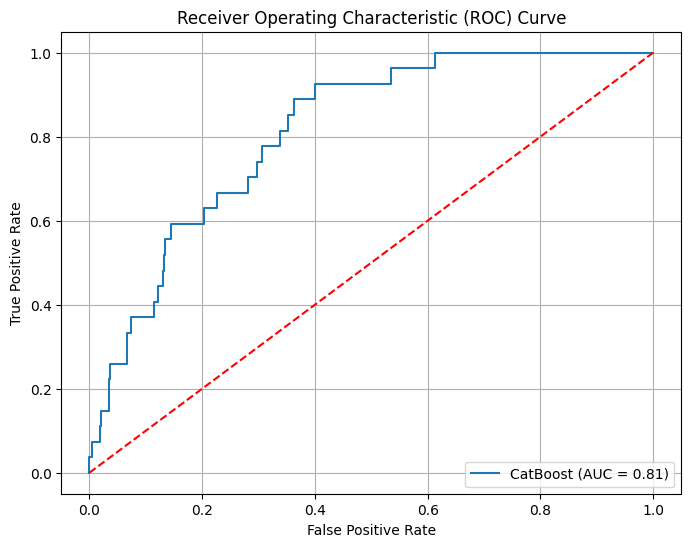

In [32]:
!pip install CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Calculate the class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

# Initialize the CatBoost classifier with class weights
catboost_model = CatBoostClassifier(
    random_state=42,
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=class_weights,  # Set class weights manually
    verbose=0  # Suppress training output
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict class labels
y_pred = catboost_model.predict(X_test)

# Predict probabilities
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='CatBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Learning rate set to 0.020289
0:	learn: 0.6816818	total: 3.38ms	remaining: 3.37s
1:	learn: 0.6706890	total: 6.74ms	remaining: 3.36s
2:	learn: 0.6610593	total: 10.2ms	remaining: 3.39s
3:	learn: 0.6515552	total: 14.1ms	remaining: 3.5s
4:	learn: 0.6417644	total: 17.1ms	remaining: 3.41s
5:	learn: 0.6330913	total: 20.4ms	remaining: 3.38s
6:	learn: 0.6225833	total: 23.6ms	remaining: 3.34s
7:	learn: 0.6146286	total: 26.9ms	remaining: 3.33s
8:	learn: 0.6072499	total: 30.1ms	remaining: 3.32s
9:	learn: 0.5999438	total: 33.3ms	remaining: 3.3s
10:	learn: 0.5931361	total: 36.9ms	remaining: 3.32s
11:	learn: 0.5850237	total: 40.9ms	remaining: 3.37s
12:	learn: 0.5783027	total: 45.1ms	remaining: 3.42s
13:	learn: 0.5725298	total: 48.6ms	remaining: 3.42s
14:	learn: 0.5650774	total: 51.9ms	remaining: 3.41s
15:	learn: 0.5589530	total: 55.2ms	remaining: 3.4s
16:	learn: 0.5535243	total: 58.6ms	remaining: 3.39s
17:	learn: 0.5476359	total: 62.2ms	remaining: 3.4s
18:	learn: 0.5420488	total: 65.6ms	remaining: 3.

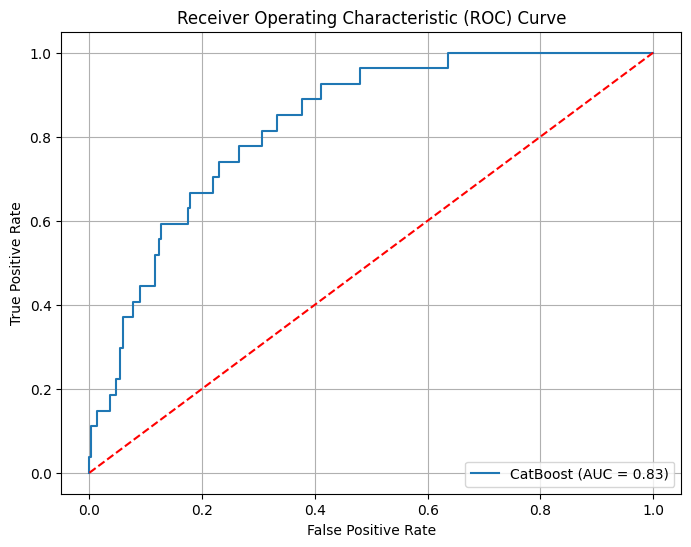

In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Calculate the class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

# Initialize the CatBoost classifier with class weights
catboost_model = CatBoostClassifier(
    random_state=42,
    class_weights=class_weights) # Set class weights manually

# Train the model
catboost_model.fit(X_train, y_train)

# Predict class labels
y_pred = catboost_model.predict(X_test)

# Predict probabilities
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='CatBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [35]:
catboost_report = classification_report(y_test, y_pred, output_dict=True)
# Collect metrics for the CatBoost model
catboost_metrics = {
    'Model': 'CatBoost with Class Weights',
    'Precision (Class 1)': catboost_report['1.0']['precision'],
    'Recall (Class 1)': catboost_report['1.0']['recall'],
    'F1-Score (Class 1)': catboost_report['1.0']['f1-score'],
    'Accuracy': catboost_report['accuracy'],
    'ROC AUC Score': roc_auc
}

# Append CatBoost metrics to the model_metrics list
model_metrics.append(catboost_metrics)

In [36]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define parameters for GridSearch
params = {
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

# Optimize for F1 score
grid = GridSearchCV(LGBMClassifier(random_state=42), params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Use the best model from Grid Search
best_model = grid.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207978 -> initscore=-1.337156
[LightGBM] [Info] Start training from score -1.337156
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       517
         1.0       0.28      0.26      0.27        27

    accuracy                           0.93       544
   macro avg       0.62      0.61      0.62       544
weighted av

In [37]:
# Collect metrics for the best LightGBM model with GridSearchCV for class_weight
lgb_report = classification_report(y_test, y_pred, output_dict=True)
lgb_metrics = {
    'Model': 'LightGBM (GridSearch on Class Weight)',
    'Precision (Class 1)': lgb_report['1.0']['precision'],
    'Recall (Class 1)': lgb_report['1.0']['recall'],
    'F1-Score (Class 1)': lgb_report['1.0']['f1-score'],
    'Accuracy': lgb_report['accuracy'],
    'ROC AUC Score': roc_auc
}
model_metrics.append(lgb_metrics)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       517
         1.0       0.18      0.26      0.21        27

    accuracy                           0.90       544
   macro avg       0.57      0.60      0.58       544
weighted avg       0.92      0.90      0.91       544

Confusion Matrix:
 [[485  32]
 [ 20   7]]
ROC AUC Score: 0.7737660290851781


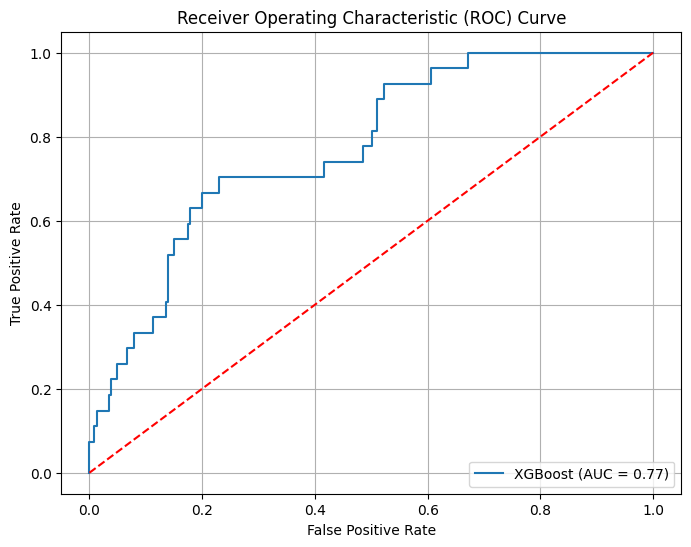

In [38]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the model on the resampled dataset
xgb_model.fit(X_train_res, y_train_res)

# Predict class labels
y_pred = xgb_model.predict(X_test)

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [39]:
pip install imbalance-xgboost

Focal Loss Model - Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       517
         1.0       0.50      0.11      0.18        27

    accuracy                           0.95       544
   macro avg       0.73      0.55      0.58       544
weighted avg       0.93      0.95      0.94       544

Focal Loss Model - Confusion Matrix:
 [[514   3]
 [ 24   3]]


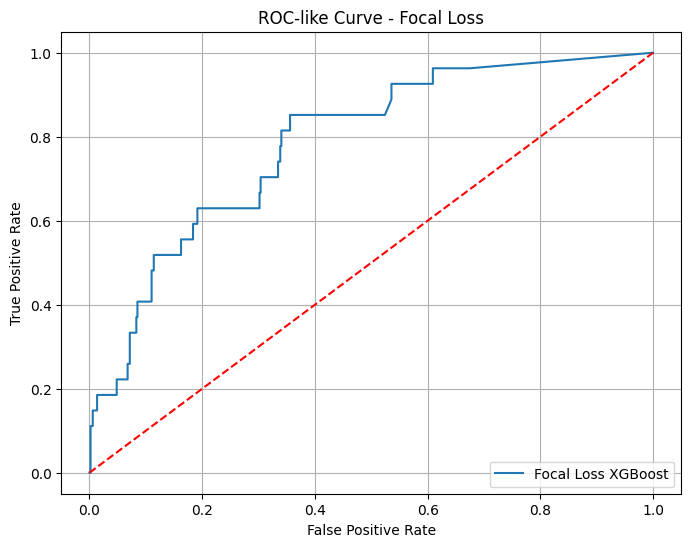

In [40]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
import functools
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, LeaveOneOut, cross_validate
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Initialize the imbalance XGBoost classifier with a base configuration for focal loss
xgboster_focal = imb_xgb(special_objective='focal')

# Set the parameters for grid search on focal_gamma and imbalance_alpha to increase recall for class 1
params_focal = {
    'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0],  # Higher focal gamma to focus more on the minority class
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]  # Different levels of imbalance handling
}

# Perform Grid Search with Cross Validation for focal loss booster
CV_focal_booster = GridSearchCV(xgboster_focal, params_focal, cv=3)
CV_focal_booster.fit(X_train_np, y_train_np)

# Best model from Grid Search with focal loss
best_focal_model = CV_focal_booster.best_estimator_

# Predict class labels using the best focal model
y_pred_focal = best_focal_model.predict(X_test_np)

# Predict outputs
y_pred_sigmoid_output = best_focal_model.predict_sigmoid(X_test_np)  # Sigmoid output
y_pred_class_output = best_focal_model.predict_determine(X_test_np)  # Class determination output
y_pred_prob_output = best_focal_model.predict_two_class(X_test_np)  # Probabilities of two classes

# Convert predictions to binary values using an appropriate threshold
threshold = 0.5  # Adjust threshold if needed to improve recall
y_pred_focal_binary = (y_pred_prob_output[:, 1] > threshold).astype(int)

# Classification report for focal loss model
print("Focal Loss Model - Classification Report:\n", classification_report(y_test_np, y_pred_focal_binary))

# Confusion matrix for focal loss model
cm_focal = confusion_matrix(y_test_np, y_pred_focal_binary)
print("Focal Loss Model - Confusion Matrix:\n", cm_focal)

# Plot ROC-like Curve using predicted labels and true labels
fpr_focal, tpr_focal, thresholds_focal = roc_curve(y_test_np, y_pred_prob_output[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_focal, tpr_focal, label='Focal Loss XGBoost')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Curve - Focal Loss')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [41]:
# Collect metrics for the Focal Loss XGBoost model
focal_xgb_report = classification_report(y_test_np, y_pred_focal_binary, output_dict=True)
focal_xgb_metrics = {
    'Model': 'Focal Loss XGBoost',
    'Precision (Class 1)': focal_xgb_report['1.0']['precision'],
    'Recall (Class 1)': focal_xgb_report['1.0']['recall'],
    'F1-Score (Class 1)': focal_xgb_report['1.0']['f1-score'],
    'Accuracy': focal_xgb_report['accuracy'],
    'ROC AUC Score': roc_auc_score(y_test_np, y_pred_prob_output[:, 1])  # Use the ROC AUC score from focal loss model
}
model_metrics.append(focal_xgb_metrics)

In [42]:
# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(model_metrics)

# Export the DataFrame to Excel
metrics_df.to_excel('model_comparison_report.xlsx', index=False)

print("Model comparison report saved to 'model_comparison_report.xlsx'")

Model comparison report saved to 'model_comparison_report.xlsx'


In [43]:
!ls

catboost_info  customer_churn.csv  model_comparison_report.xlsx  sample_data


In [44]:
from google.colab import files
files.download('model_comparison_report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from google.colab import files
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined and available
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define thresholds to evaluate
thresholds = [0.2, 0.25, 0.3, 0.4]

# Train Standard XGBoost Model
standard_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
standard_xgb_model.fit(X_train, y_train)

# Train XGBoost Model with GridSearch for scale_pos_weight
counter = Counter(y_train)
initial_scale_pos_weight = counter[0.0] / counter[1.0]
param_grid = {
    'scale_pos_weight': [initial_scale_pos_weight * 0.5, initial_scale_pos_weight, initial_scale_pos_weight * 1.5, initial_scale_pos_weight * 2.0]
}
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

# Train LightGBM Model with GridSearch for class_weight
params = {
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}
grid = GridSearchCV(LGBMClassifier(random_state=42), params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
best_lgb_model = grid.best_estimator_

# Train Imbalance-XGBoost Focal Loss Model
xgboster_focal = imb_xgb(special_objective='focal')
params_focal = {
    'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0],
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]
}
CV_focal_booster = GridSearchCV(xgboster_focal, params_focal, cv=3)
CV_focal_booster.fit(X_train.values, y_train.values)
best_focal_model = CV_focal_booster.best_estimator_

# Train CatBoost Model with class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

catboost_model = CatBoostClassifier(
    random_state=42,
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=class_weights,
    verbose=0  # Suppress training output
)
catboost_model.fit(X_train, y_train)

# Initialize a list to store the results for the ensemble model
ensemble_results = []

# Function to evaluate ensemble at thresholds
def evaluate_ensemble_at_thresholds(y_true, y_prob, model_name):
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)

        ensemble_results.append({
            'Model': model_name,
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        })

# Calculate ensemble probabilities
ensemble_prob = (
    0.33 * standard_xgb_model.predict_proba(X_test)[:, 1] +
    0.33 * best_focal_model.predict_two_class(X_test.values)[:, 1] +
    0.33 * best_lgb_model.predict_proba(X_test)[:, 1]
)

# Evaluate ensemble model at different thresholds
evaluate_ensemble_at_thresholds(y_test, ensemble_prob, "Ensemble (XGBoost, Focal Loss, LightGBM)")

# Create a DataFrame from the ensemble results
df_ensemble_results = pd.DataFrame(ensemble_results)

# Save the ensemble results to an Excel file
df_ensemble_results.to_excel('ensemble_model_comparison_report.xlsx', index=False)

# Download the file in Google Colab
files.download('ensemble_model_comparison_report.xlsx')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207978 -> initscore=-1.337156
[LightGBM] [Info] Start training from score -1.337156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from google.colab import files
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reset the index for X_train and y_train if necessary
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define thresholds to evaluate
thresholds = [0.2, 0.25, 0.3, 0.4]

# Train Standard XGBoost Model
standard_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
standard_xgb_model.fit(X_train, y_train)

# Train XGBoost Model with GridSearch for scale_pos_weight
counter = Counter(y_train)
initial_scale_pos_weight = counter[0.0] / counter[1.0]
param_grid = {
    'scale_pos_weight': [initial_scale_pos_weight * 0.5, initial_scale_pos_weight, initial_scale_pos_weight * 1.5, initial_scale_pos_weight * 2.0]
}
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

# Train LightGBM Model with GridSearch for class_weight
params = {
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}
grid = GridSearchCV(LGBMClassifier(random_state=42), params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
best_lgb_model = grid.best_estimator_

# Train Imbalance-XGBoost Focal Loss Model
xgboster_focal = imb_xgb(special_objective='focal')
params_focal = {
    'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0],
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]
}
CV_focal_booster = GridSearchCV(xgboster_focal, params_focal, cv=3)
CV_focal_booster.fit(X_train.values, y_train.values)
best_focal_model = CV_focal_booster.best_estimator_

# Train CatBoost Model with class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

catboost_model = CatBoostClassifier(
    random_state=42,
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=class_weights,
    verbose=0  # Suppress training output
)
catboost_model.fit(X_train, y_train)

# Initialize a list to store the results for the ensemble model
ensemble_results = []

# Function to evaluate ensemble at thresholds
def evaluate_ensemble_at_thresholds(y_true, y_prob, model_name):
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)

        ensemble_results.append({
            'Model': model_name,
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        })

# Calculate ensemble probabilities (now including CatBoost)
ensemble_prob = (
    0.25 * standard_xgb_model.predict_proba(X_test)[:, 1] +
    0.25 * best_focal_model.predict_two_class(X_test.values)[:, 1] +
    0.25 * best_lgb_model.predict_proba(X_test)[:, 1] +
    0.25 * catboost_model.predict_proba(X_test)[:, 1]
)

# Evaluate ensemble model at different thresholds
evaluate_ensemble_at_thresholds(y_test, ensemble_prob, "Ensemble (XGBoost, Focal Loss, LightGBM, CatBoost)")

# Create a DataFrame from the ensemble results
df_ensemble_results = pd.DataFrame(ensemble_results)

# Save the ensemble results to an Excel file
df_ensemble_results.to_excel('ensemble_model_comparison_report.xlsx', index=False)

# Download the file in Google Colab
files.download('ensemble_model_comparison_report.xlsx')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207978 -> initscore=-1.337156
[LightGBM] [Info] Start training from score -1.337156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>